## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.Dense(units = 128, activation = 'relu')(x)
    out = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
Compile 模型
"""
adam = keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam,loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 15ms/step - loss: 2.1320 - accuracy: 0.2325 - val_loss: 1.7924 - val_accuracy: 0.3577
Epoch 2/500
196/196 [==============================] - 2s 12ms/step - loss: 1.7522 - accuracy: 0.3717 - val_loss: 1.6598 - val_accuracy: 0.4037
Epoch 3/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6445 - accuracy: 0.4097 - val_loss: 1.6088 - val_accuracy: 0.4255
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5890 - accuracy: 0.4317 - val_loss: 1.6366 - val_accuracy: 0.4138
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5357 - accuracy: 0.4557 - val_loss: 1.5019 - val_accuracy: 0.4686
Epoch 6/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4674 - accuracy: 0.4753 - val_loss: 1.5027 - val_accuracy: 0.4596
Epoch 7/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4475 - accuracy: 0.4812 - val_loss: 1.4599 - val_accuracy:

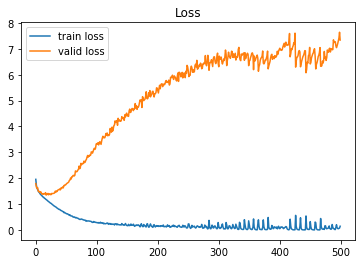

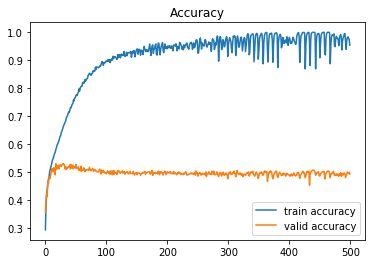

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [6]:
sgd = keras.optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd,loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, 
          epochs= 100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 14ms/step - loss: 2.3152 - accuracy: 0.1162 - val_loss: 2.2040 - val_accuracy: 0.1997
Epoch 2/100
196/196 [==============================] - 2s 12ms/step - loss: 2.1877 - accuracy: 0.2157 - val_loss: 2.1383 - val_accuracy: 0.2397
Epoch 3/100
196/196 [==============================] - 3s 14ms/step - loss: 2.1259 - accuracy: 0.2543 - val_loss: 2.0892 - val_accuracy: 0.2668
Epoch 4/100
196/196 [==============================] - 3s 15ms/step - loss: 2.0766 - accuracy: 0.2783 - val_loss: 2.0505 - val_accuracy: 0.2892
Epoch 5/100
196/196 [==============================] - 2s 13ms/step - loss: 2.0422 - accuracy: 0.2918 - val_loss: 2.0187 - val_accuracy: 0.2988
Epoch 6/100
196/196 [==============================] - 3s 13ms/step - loss: 2.0126 - accuracy: 0.2986 - val_loss: 1.9910 - val_accuracy: 0.3079
Epoch 7/100
196/196 [==============================] - 3s 13ms/step - loss: 1.9890 - accuracy: 0.3112 - val_loss: 1.9666 - val_accuracy:

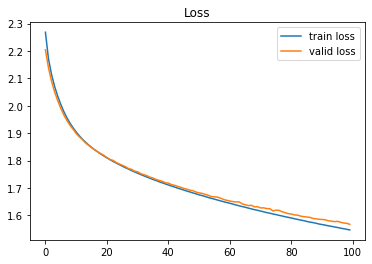

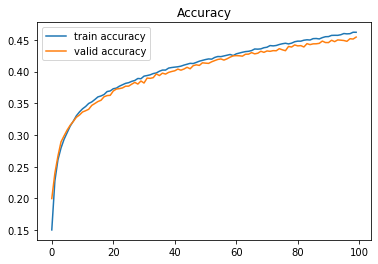

In [10]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()